In [ ]:
LOADING PACKAGE AND DATA

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Check current directory
current_directory = os.getcwd()

# Specify the file path
file_name = "./dataset/tiki1.csv"
file_path = os.path.join(current_directory, file_name)
df = pd.read_csv(file_path)

In [3]:
# Check if there are any null values
print(df.isnull().sum())

Link                 0
Name                 0
Brand                0
Price                0
Sale                 0
Stars               92
NumberOfCoupon     659
5 stars             92
4 stars             92
3 stars             92
2 stars             92
1 star              92
Reviews           1000
dtype: int64


In [4]:
# Check columns to make sure you have features and a target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Link            1000 non-null   object 
 1   Name            1000 non-null   object 
 2   Brand           1000 non-null   object 
 3   Price           1000 non-null   object 
 4   Sale            1000 non-null   object 
 5   Stars           908 non-null    float64
 6   NumberOfCoupon  341 non-null    float64
 7   5 stars         908 non-null    float64
 8   4 stars         908 non-null    float64
 9   3 stars         908 non-null    float64
 10  2 stars         908 non-null    float64
 11  1 star          908 non-null    float64
 12  Reviews         0 non-null      float64
dtypes: float64(8), object(5)
memory usage: 101.7+ KB


In [ ]:
CLEAN DATA

In [11]:
# List of columns to drop
columns_to_drop = ['Reviews', 'Link', 'Name', 'Brand']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [23]:
# Add Category
df.loc[:199, 'Category'] =  1 #'Dụng cụ nhà bếp'
df.loc[200:399, 'Category'] = 2 #'Trang trí nhà cửa'
df.loc[400:599, 'Category'] = 3 #'Đồ dùng phòng ngủ'
df.loc[600:799, 'Category'] = 4 #'Ngoài trời sân vườn'
df.loc[800:999, 'Category'] = 5 #'Đồ nội thất'

In [24]:
# Impute missing value to specific columns
selected_columns = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star', 'Stars']

# Iterate through selected columns and impute missing values with column means
for column in selected_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [25]:
# Add 0 to null value in column NumberOfCoupon
df['NumberOfCoupon'].fillna(0, inplace=True)

In [26]:
# Convert numerical data to number (price, stars, sale)
# Convert price to int
df['Price'] = df['Price'].astype(str) # turn object to str
df['Price'] = df['Price'].str.replace(r'\D', '', regex=True).astype(float) # remove character

# Convert sale to int
df['Sale'] = df['Sale'].astype(str) # turn object to str
df['Sale'] = df['Sale'].str.replace(r'\D', '', regex=True).astype(float) # remove character

# Convert the '5 stars', .. '1 star' column to integers only if it's not null,
df[['5 stars', '4 stars', '3 stars', '2 stars', '1 star']] = df[['5 stars', '4 stars', '3 stars', '2 stars', '1 star']].apply(
    lambda x: pd.to_numeric(x, errors='coerce').astype(float)
) 

In [27]:
# Check if there are any null values
print(df.isnull().sum())

# Check columns to make sure you have features and a target variable
print(df)

Price             0
Sale              0
Stars             0
NumberOfCoupon    0
5 stars           0
4 stars           0
3 stars           0
2 stars           0
1 star            0
Category          0
dtype: int64
          Price      Sale     Stars  NumberOfCoupon    5 stars     4 stars  \
0    44100000.0  500000.0  4.600000             5.0  110.00000   20.000000   
1    51800000.0  302700.0  4.500000             5.0   67.00000   18.000000   
2    13200000.0  219600.0  5.000000             0.0    5.00000    0.000000   
3    69300000.0  500000.0  4.600000             5.0  441.00000  110.000000   
4    23100000.0  458000.0  5.000000             5.0  821.00000   71.000000   
..          ...       ...       ...             ...        ...         ...   
995  10500000.0    5600.0  4.500000             0.0    4.00000    5.000000   
996   4500000.0    9800.0  5.000000             0.0    4.00000    0.000000   
997   2490000.0    2500.0  5.000000             4.0    2.00000    0.000000   
998  22

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DESCRIPTIVE STATISTICS

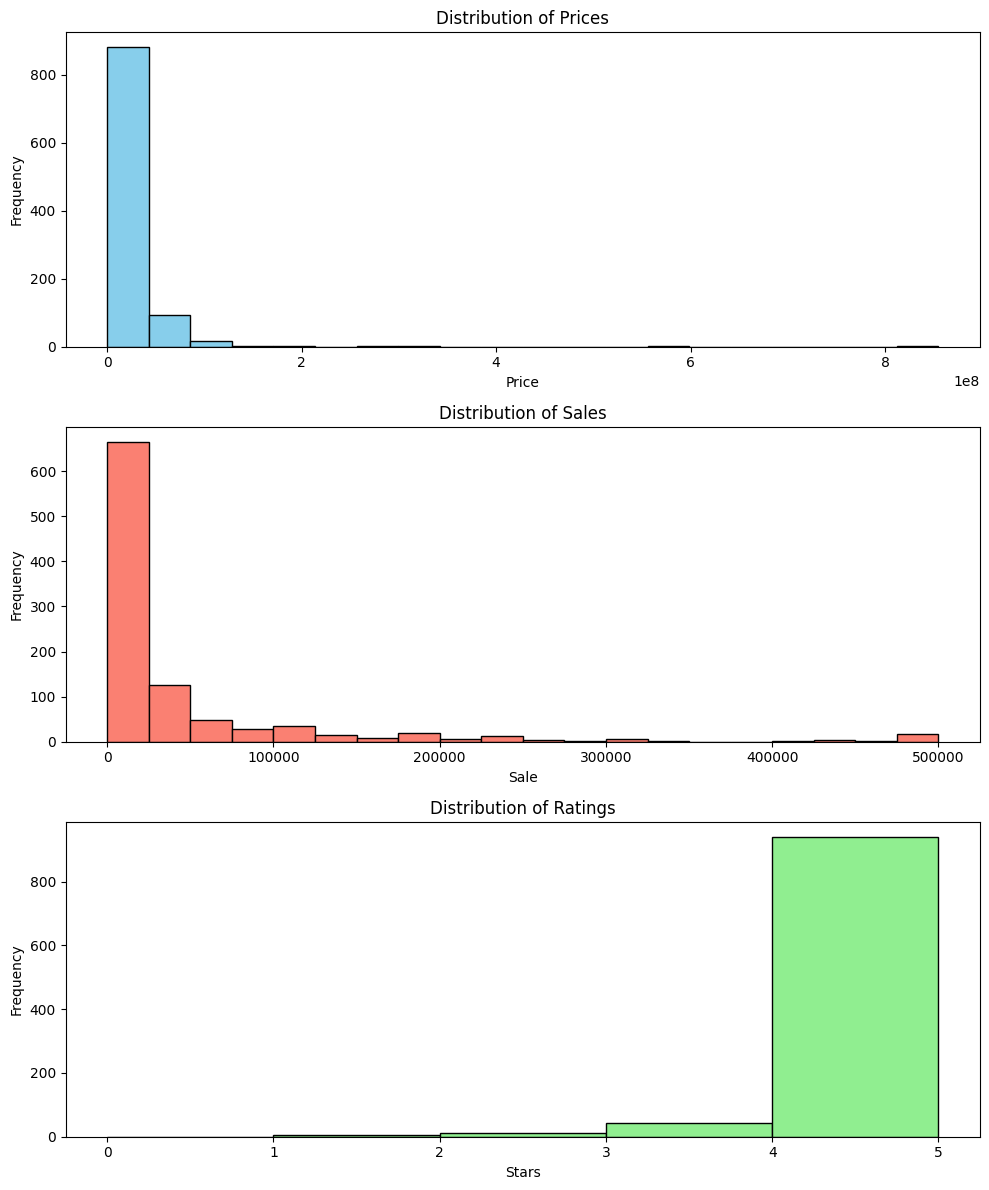

In [29]:
# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Histogram for 'Price'
axes[0].hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Histogram for 'Sale'
axes[1].hist(df['Sale'].dropna(), bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Sales')
axes[1].set_xlabel('Sale')
axes[1].set_ylabel('Frequency')

# Histogram for 'Stars'
axes[2].hist(df['Stars'].dropna(), bins=5, range=(0, 5), color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Ratings')
axes[2].set_xlabel('Stars')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [36]:
# Summary count, mean, std, min, max, 25% quantile, 50% quantile, 75% quantile 
selected_columns = ['Price', 'Sale', 'Stars', 'NumberOfCoupon']

summary_table = df[selected_columns].describe().transpose()

# Display the summary table
print("Summary Statistics:")
print(summary_table)

Summary Statistics:
                 count          mean           std       min        25%  \
Price           1000.0  2.070144e+07  4.147369e+07  100000.0  4275000.0   
Sale            1000.0  4.564730e+04  8.835636e+04     100.0     4100.0   
Stars           1000.0  4.563767e+00  5.054636e-01       1.0        4.5   
NumberOfCoupon  1000.0  1.189000e+00  2.039961e+00       0.0        0.0   

                       50%         75%          max  
Price           11000000.0  22962500.0  854900000.0  
Sale               12600.0     40700.0     500000.0  
Stars                  4.6         4.8          5.0  
NumberOfCoupon         0.0         2.0         17.0  


In [ ]:
What is the percentage of sale for each category?
What is the total sales for each category?

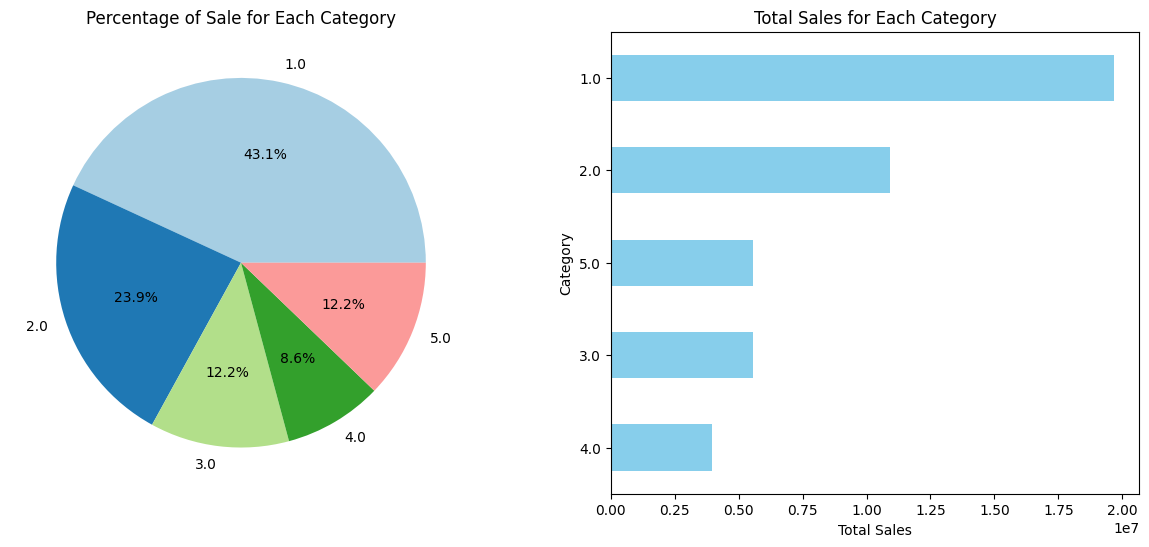

In [31]:
df['Sale'] = pd.to_numeric(df['Sale'], errors='coerce')  # Convert 'Sale' column to numeric

# Group by 'Category' and calculate the sum of sales for each category
category_sales = df.groupby('Category')['Sale'].sum()

# Calculate the total sale for all categories
total_sale = category_sales.sum()

# Calculate the percentage of sale for each category
percentage_sale = (category_sales / total_sale) * 100

# Plot the pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Pie chart
axes[0].pie(percentage_sale, labels=percentage_sale.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Percentage of Sale for Each Category')
axes[0].set_ylabel('')  # Remove the default 'Category' label

# Bar chart
category_sales.sort_values().plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Total Sales for Each Category')
axes[1].set_xlabel('Total Sales')

plt.show()

In [ ]:
STATISTICAL CALCULATIONS

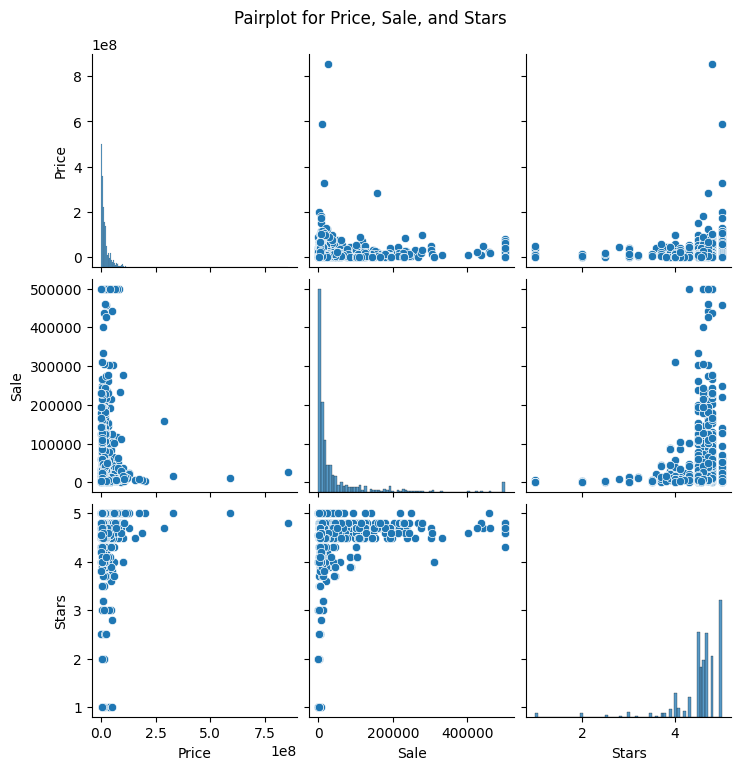

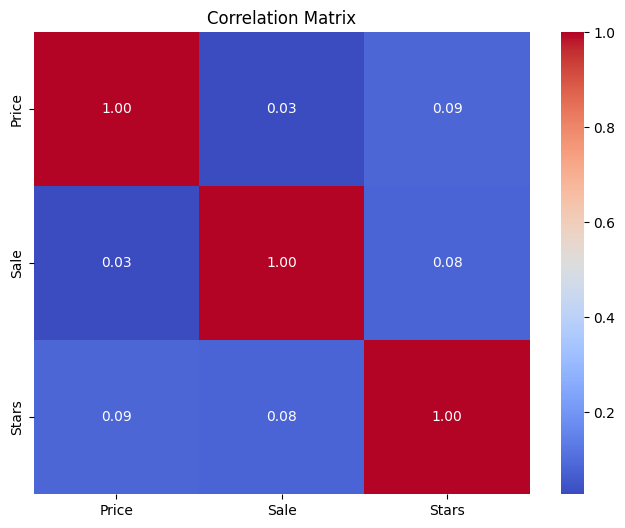

In [35]:
# Correlations: Check correlations between variables like 'Price', 'Sale', 'Stars', and 'Reviews' to understand relationships
sns.pairplot(df[selected_columns].dropna())
plt.suptitle("Pairplot for Price, Sale, and Stars", y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = df[selected_columns].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()